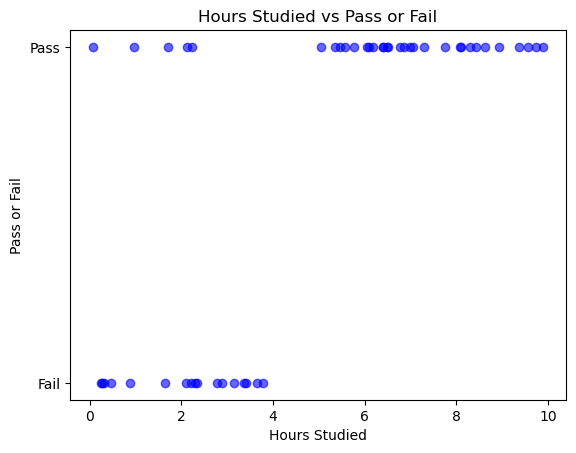

Confusion Matrix:
[[4 0]
 [2 4]]


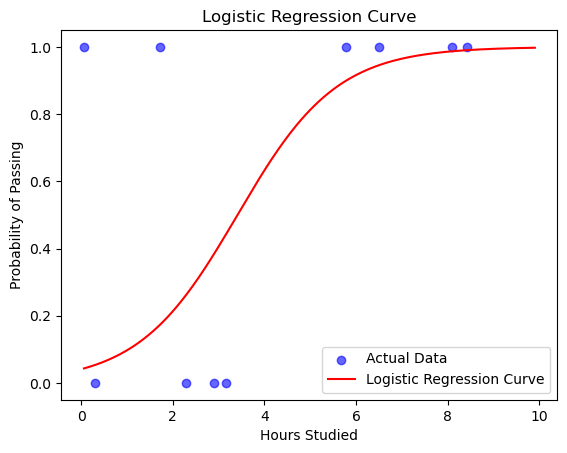

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load data
data = pd.read_csv("student_pass.csv")
df = pd.DataFrame(data)

# Scatter plot
plt.scatter(df['Hours_Studied'], df['Pass'], color='blue', alpha=0.6)
plt.title('Hours Studied vs Pass or Fail')
plt.xlabel('Hours Studied')
plt.ylabel('Pass or Fail')
plt.yticks([0, 1], ['Fail', 'Pass'])  # Label the y-axis ticks
plt.show()

# Remove the 'Student' column
df = df.drop(columns='Student')

# Separate features and target variable
X = df[['Hours_Studied']]  # Feature (Hours_Studied)
y = df['Pass']  # Target (Pass or Fail)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate a range of values for X to plot the logistic curve
# Create a DataFrame with the correct column name for X_range
X_range = np.linspace(X['Hours_Studied'].min(), X['Hours_Studied'].max(), 300).reshape(-1, 1)
X_range_df = pd.DataFrame(X_range, columns=['Hours_Studied'])  # Ensure the feature name is 'Hours_Studied'

# Get predicted probabilities for each X value (for plotting the logistic curve)
y_prob = model.predict_proba(X_range_df)[:, 1]

# Plot the logistic curve
plt.scatter(X_test['Hours_Studied'], y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_range, y_prob, color='red', label="Logistic Regression Curve")
plt.title("Logistic Regression Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()
